## US Covid-19 Daily Cases and Deaths

source: [WHO global covid data](https://covid19.who.int/WHO-COVID-19-global-data.csv) from the WHO Coronavirus (COVID-19) [US Dashboard](https://covid19.who.int/region/amro/country/us)


##### Imports


In [1]:
# Import libraries

import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

%matplotlib inline


#### Create the directories


In [2]:
# create the data directories
try:
    os.mkdir('data')
    os.mkdir('data/charts')
except FileExistsError:
    pass


#### Import the Data


In [3]:
# Data dowload url
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

# Download the file contents
file = requests.get(url, allow_redirects=True)

# Write the file contents to disk
open('data/WHO-COVID-19-global-data.csv', 'wb').write(file.content)

# Read the data as a dataframe df
df = pd.read_csv('data/WHO-COVID-19-global-data.csv')

# Drop the columns I don't need
df.drop(['Country', 'WHO_region'], axis=1, inplace=True)

# Filter by US data only usdf
usdf = df[(df['Country_code'] == 'US') & (df['New_cases'] != 0)]

# Display the data head/tail
usdf


,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
268957,2020-01-20,US,1,1,0,0
268962,2020-01-25,US,5,6,0,0
268963,2020-01-26,US,1,7,0,0
268965,2020-01-28,US,1,8,0,0
268970,2020-02-02,US,1,9,0,0
...,...,...,...,...,...,...
270096,2023-03-04,US,227828,102247392,2197,1111342
270103,2023-03-11,US,170593,102417985,1887,1113229
270110,2023-03-18,US,126613,102544598,1741,1114970
270117,2023-03-25,US,152968,102697566,2084,1117054


#### Summary


In [4]:
# Summary

# Summary variables
min_new_cases = usdf['New_cases'].min()
max_new_cases = usdf['New_cases'].max()
min_daily_death = usdf['New_deaths'].min()
max_daily_death = usdf['New_deaths'].max()
total_cases = usdf['New_cases'].sum()
total_deaths = usdf['New_deaths'].sum()
now = datetime.datetime.now()

# Summary disply
print('\t\tSUMMARY\n')
print(f"Date and Time: {now.strftime('%Y-%m-%d %H:%M:%S')}\n")
print(f'The minimum cases in a single day = {min_new_cases:10}')
print(f'The maximum cases in a single day = {max_new_cases:10}')
print(f'The minimum deaths in a single day = {min_daily_death:9}')
print(f'The maximum deaths in a single day = {max_daily_death:9}')
print(f'\nTotal cases = {total_cases:32}')
print(f'Total deaths = {total_deaths:31}')


		SUMMARY

Date and Time: 2023-04-08 21:03:26

The minimum cases in a single day =          1
The maximum cases in a single day =    1265520
The minimum deaths in a single day =     -2437
The maximum deaths in a single day =      5061

Total cases =                        102873924
Total deaths =                         1118800


#### Top 5 days with the most deaths


In [5]:
usdf.nlargest(5, 'New_deaths')


,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
269348,2021-02-14,US,97431,27390855,5061,492061
270046,2023-01-13,US,448092,100331502,4407,1089627
269702,2022-02-03,US,296458,75010243,4076,891836
269318,2021-01-15,US,226378,23067646,4066,400233
269312,2021-01-09,US,269765,21646487,3978,380356


#### Last 10 days reported


In [6]:
usdf.tail(10)


,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
270060,2023-01-27,US,294867,100934394,3743,1097034
270067,2023-02-03,US,285402,101219796,3452,1100486
270074,2023-02-10,US,278228,101498024,3440,1103926
270081,2023-02-17,US,254372,101752396,2857,1106783
270089,2023-02-25,US,267168,102019564,2362,1109145
270096,2023-03-04,US,227828,102247392,2197,1111342
270103,2023-03-11,US,170593,102417985,1887,1113229
270110,2023-03-18,US,126613,102544598,1741,1114970
270117,2023-03-25,US,152968,102697566,2084,1117054
270124,2023-04-01,US,176358,102873924,1746,1118800


# Charts


#### Daily cases and deaths per day


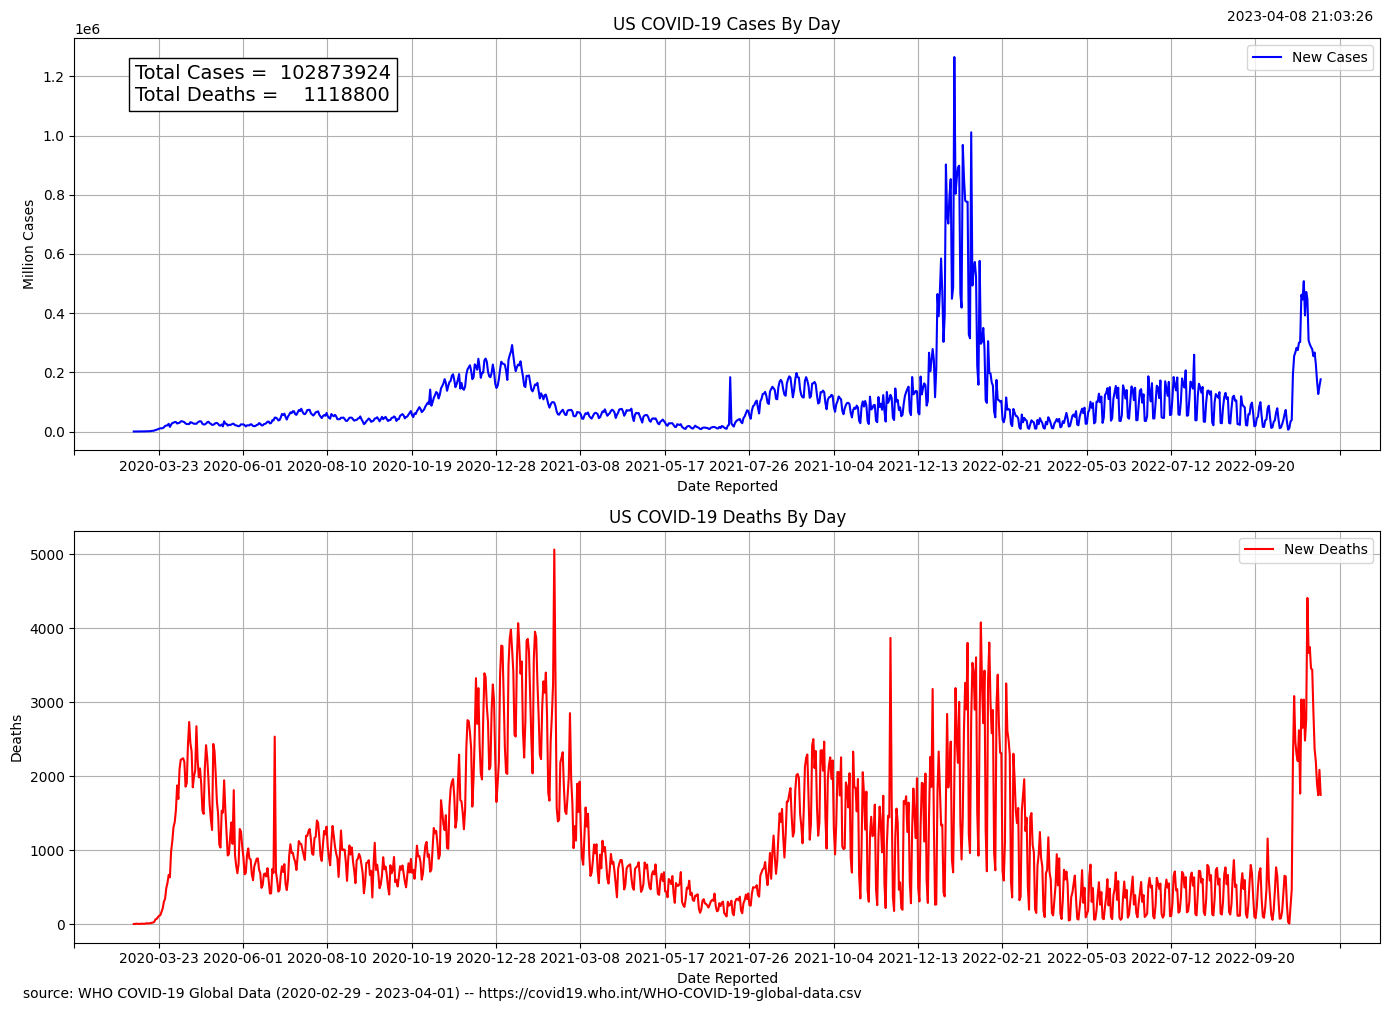

In [7]:
# Drop a single row of negetive deaths data
usdf = usdf[usdf['New_deaths'] > 0]

# Figure text variables
start_date = usdf['Date_reported'].min()
end_date = usdf['Date_reported'].max()

# Figure and text
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
fig.text(0.02, 0.003,
         f'source: WHO COVID-19 Global Data ({start_date} - {end_date}) -- {url}')
fig.text(0.88, 0.98, f"{now.strftime('%Y-%m-%d %H:%M:%S')}")
fig.text(0.1, 0.9, f'Total Cases = {total_cases:10}\nTotal Deaths = {total_deaths:10}', fontsize=14,
         bbox=dict(facecolor='white', alpha=1))

# New Cases axes settings
ax[0].set(xlabel='Date Reported', ylabel='Million Cases',
          title='US COVID-19 Cases By Day')
ax[0].grid()
ax[0].plot(usdf['Date_reported'], usdf['New_cases'], 'b', label='New Cases')
ax[0].legend(loc=0, frameon=True)

# New Deaths axes settings
ax[1].set(xlabel='Date Reported', ylabel='Deaths',
          title='US COVID-19 Deaths By Day')
ax[1].grid()
ax[1].plot(usdf['Date_reported'], usdf['New_deaths'], 'r', label='New Deaths')
ax[1].legend(loc=0, frameon=True)

# x axis label range
start, stop = ax[0].get_xlim()
plt.setp(ax, xticks=np.arange(start, stop+1, 70))

# show the subplots
plt.tight_layout()
plt.show()


In [8]:
# save the chart jpg to data/charts

# unique file name every run
file_path_name = f'data/charts/us_covid19_cd_{now.strftime("%Y%m%d_%H%M%S")}.jpg'

# save figure as jpg
fig.savefig(file_path_name)
